In [1]:
from config import CONFIG
from utils import series_to_supervised

CONFIG

{'columns': ['Close', 'Volume', 'Low', 'High'],
 'csv_src_file': 'BTC_ETH',
 'filename': 'BTC_ETH_lstm_i30_o12_Close_Volume_Low_High',
 'folder': {'data': 'data/', 'weights': 'weights/'},
 'input_size': 30,
 'lstm_hidden_size': 200,
 'name': 'lstm',
 'output_size': 12,
 'pair': 'BTC_ETH',
 'period': 300}

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
 
#data file path
dfp = ''.join([CONFIG['folder']['data'], CONFIG['csv_src_file'], '.csv'])

#Columns of price data to use
columns = CONFIG['columns']
# df = pd.read_csv(dfp).dropna().tail(1000000)
dataset = pd.read_csv(dfp)

# to drop values before 2018 1514764800, March 2018 1519862400, July 2017 1498867200
dataset = dataset[dataset.Timestamp > 1514808000]
dataset.head()

,Close,Timestamp,High,Low,Open,Volume
252659,0.056058,1514808300,0.056160,0.05594,0.055956,9.457136
252660,0.056090,1514808600,0.056160,0.05594,0.056058,11.858320
252661,0.056180,1514808900,0.056466,0.05600,0.056090,16.313157
252662,0.056300,1514809200,0.056356,0.05616,0.056180,18.992666
252663,0.056346,1514809500,0.056440,0.05630,0.056300,28.308644


In [3]:
values = dataset.loc[:,columns].values

In [4]:
# parameters to prepare the dataset for learning 
n_lag = CONFIG['input_size']
n_out = CONFIG['output_size']
n_features = len(columns)
n_lag,n_features,n_out

(30, 4, 12)

In [5]:
# scale dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [6]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_out)
reframed.head(10)

,var1(t-30),var2(t-30),var3(t-30),var4(t-30),var1(t-29),var2(t-29),var3(t-29),var4(t-29),var1(t-28),var2(t-28),...,var3(t+9),var4(t+9),var1(t+10),var2(t+10),var3(t+10),var4(t+10),var1(t+11),var2(t+11),var3(t+11),var4(t+11)
30,0.049469,0.010865,0.052426,0.032780,0.049927,0.013624,0.052426,0.032780,0.051217,0.018742,...,0.054226,0.039027,0.050971,0.026566,0.054562,0.036040,0.052933,0.002849,0.056170,0.035531
31,0.049927,0.013624,0.052426,0.032780,0.051217,0.018742,0.053295,0.037216,0.052933,0.021821,...,0.054562,0.036040,0.052933,0.002849,0.056170,0.035531,0.054291,0.010862,0.056459,0.036261
32,0.051217,0.018742,0.053295,0.037216,0.052933,0.021821,0.055594,0.035623,0.053591,0.032524,...,0.056170,0.035531,0.054291,0.010862,0.056459,0.036261,0.053033,0.008701,0.056242,0.036262
33,0.052933,0.021821,0.055594,0.035623,0.053591,0.032524,0.057611,0.036840,0.052929,0.047585,...,0.056459,0.036261,0.053033,0.008701,0.056242,0.036262,0.050614,0.027818,0.053588,0.035247
34,0.053591,0.032524,0.057611,0.036840,0.052929,0.047585,0.055739,0.035469,0.054292,0.014814,...,0.056242,0.036262,0.050614,0.027818,0.053588,0.035247,0.052933,0.048914,0.055277,0.037713
35,0.052929,0.047585,0.055739,0.035469,0.054292,0.014814,0.055885,0.036190,0.053576,0.005454,...,0.053588,0.035247,0.052933,0.048914,0.055277,0.037713,0.054935,0.039796,0.057223,0.038171
36,0.054292,0.014814,0.055885,0.036190,0.053576,0.005454,0.058187,0.036189,0.055794,0.068713,...,0.055277,0.037713,0.054935,0.039796,0.057223,0.038171,0.055150,0.006867,0.057621,0.038775
37,0.053576,0.005454,0.058187,0.036189,0.055794,0.068713,0.058259,0.037752,0.056494,0.028052,...,0.057223,0.038171,0.055150,0.006867,0.057621,0.038775,0.054669,0.019345,0.059282,0.038209
38,0.055794,0.068713,0.058259,0.037752,0.056494,0.028052,0.060491,0.040713,0.055937,0.011642,...,0.057621,0.038775,0.054669,0.019345,0.059282,0.038209,0.054062,0.013650,0.057320,0.037713
39,0.056494,0.028052,0.060491,0.040713,0.055937,0.011642,0.059046,0.039160,0.059570,0.014312,...,0.059282,0.038209,0.054062,0.013650,0.057320,0.037713,0.054123,0.004351,0.057959,0.036393


In [7]:
# drop columns we don't want to predict
# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

cols_to_drop = []

for i in range (n_out):
    for j in range(1, n_features):
        cols_to_drop.append(reframed.shape[1]-(i*n_features+j))

reframed.drop(reframed.columns[cols_to_drop], axis=1, inplace=True)

reframed.head()

,var1(t-30),var2(t-30),var3(t-30),var4(t-30),var1(t-29),var2(t-29),var3(t-29),var4(t-29),var1(t-28),var2(t-28),...,var1(t+2),var1(t+3),var1(t+4),var1(t+5),var1(t+6),var1(t+7),var1(t+8),var1(t+9),var1(t+10),var1(t+11)
30,0.049469,0.010865,0.052426,0.032780,0.049927,0.013624,0.052426,0.032780,0.051217,0.018742,...,0.050953,0.050693,0.049356,0.050930,0.052931,0.053147,0.057090,0.050658,0.050971,0.052933
31,0.049927,0.013624,0.052426,0.032780,0.051217,0.018742,0.053295,0.037216,0.052933,0.021821,...,0.050693,0.049356,0.050930,0.052931,0.053147,0.057090,0.050658,0.050971,0.052933,0.054291
32,0.051217,0.018742,0.053295,0.037216,0.052933,0.021821,0.055594,0.035623,0.053591,0.032524,...,0.049356,0.050930,0.052931,0.053147,0.057090,0.050658,0.050971,0.052933,0.054291,0.053033
33,0.052933,0.021821,0.055594,0.035623,0.053591,0.032524,0.057611,0.036840,0.052929,0.047585,...,0.050930,0.052931,0.053147,0.057090,0.050658,0.050971,0.052933,0.054291,0.053033,0.050614
34,0.053591,0.032524,0.057611,0.036840,0.052929,0.047585,0.055739,0.035469,0.054292,0.014814,...,0.052931,0.053147,0.057090,0.050658,0.050971,0.052933,0.054291,0.053033,0.050614,0.052933


In [8]:
reframed_values = reframed.values
# split into train and test sets
training_size = int(0.8* reframed_values.shape[0])
train = reframed_values[:training_size, :]
test = reframed_values[training_size:, :]

In [9]:
# split into input and outputs
n_obs = n_lag * n_features

# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

n_outputs = n_out * n_features
train_x, train_y = train[:, :n_obs], train[:, -n_out:]
test_x, test_y = test[:, :n_obs], test[:, -n_out:]

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], n_lag, n_features))
test_x = test_x.reshape((test_x.shape[0], n_lag, n_features))

# reshape output to be 3D [samples, timesteps, features]
train_y = train_y.reshape(-1, n_out, 1)
test_y = test_y.reshape(-1, n_out, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

((37111, 30, 4), (37111, 12, 1), (9278, 30, 4), (9278, 12, 1))


In [10]:
model_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model', '.json'])
model_weights_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model_weights', '.h5'])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import LSTM, CuDNNLSTM, GRU,CuDNNGRU
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from keras.layers import Dropout, Flatten
from keras.layers import Activation, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.callbacks import ModelCheckpoint

units= CONFIG['lstm_hidden_size']
dropout = .20

# design network
model = Sequential()
model.add(Bidirectional(LSTM(units), input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(dropout))

model.add(RepeatVector(n_out))

model.add(LSTM(units/2, return_sequences=True))
model.add(Dropout(dropout))

# We're only concerned with the estimating the close value,
# otherwise use n_outputs instead of 1
# Dense(n_outputs, ...
model.add(TimeDistributed(Dense(1, activation='relu')))

model.compile(loss='mae', optimizer='adam')

# store model
# serialize model to JSON
model_json = model.to_json()
with open(model_name, "w") as json_file:
    json_file.write(model_json)

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 400)               328000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 12, 400)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 100)           200400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 100)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 12, 1)             101       
Total params: 528,501
Trainable params: 528,501
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs=30
batch_size=500

In [13]:
# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_x, test_y), verbose=1, shuffle=True,
                    callbacks=[ModelCheckpoint(model_weights_name, monitor='val_loss', verbose=1,save_best_only='true',
                                              save_weights_only=True)])

Train on 37111 samples, validate on 9278 samples
Epoch 1/30
37111/37111 [==============================] - 172s 5ms/step - loss: 0.0502 - val_loss: 0.0130

Epoch 00001: val_loss improved from inf to 0.01296, saving model to weights/BTC_ETH_lstm_i30_o12_Close_Volume_Low_High_model_weights.h5
Epoch 2/30
37111/37111 [==============================] - 179s 5ms/step - loss: 0.0205 - val_loss: 0.0066

Epoch 00002: val_loss improved from 0.01296 to 0.00664, saving model to weights/BTC_ETH_lstm_i30_o12_Close_Volume_Low_High_model_weights.h5
Epoch 3/30
37111/37111 [==============================] - 173s 5ms/step - loss: 0.0186 - val_loss: 0.0072

Epoch 00003: val_loss did not improve from 0.00664
Epoch 4/30
37111/37111 [==============================] - 173s 5ms/step - loss: 0.0172 - val_loss: 0.0049

Epoch 00004: val_loss improved from 0.00664 to 0.00486, saving model to weights/BTC_ETH_lstm_i30_o12_Close_Volume_Low_High_model_weights.h5
Epoch 5/30
37111/37111 [==============================] 

In [14]:
# Load the best weights
model.load_weights(model_weights_name)
model.compile(loss='mae', optimizer='adam')
model.evaluate(test_x, test_y)

9278/9278 [==============================] - 10s 1ms/step


0.003420448019529634

In [15]:
from matplotlib import pyplot

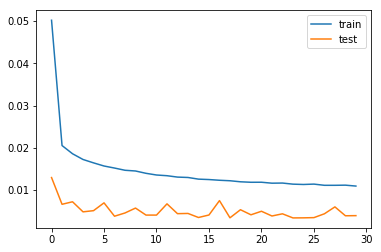

In [16]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
# Test the prediction of test data
y = model.predict(test_x)

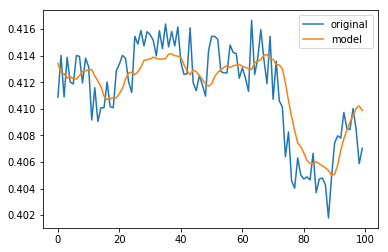

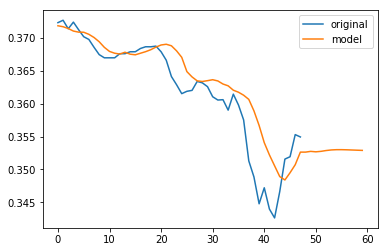

In [18]:
a = test_y[:,0]
b = y[:,0]
c = np.append(b, y[-1], axis=0)

# Show how the model fits the test data
pyplot.plot(a[:100], label='original')
pyplot.plot(b[:100], label='model')
pyplot.legend()
pyplot.show()

# Show how the model predicts data
pos = int(a.shape[0]-n_out*4)
pyplot.plot(a[pos:], label='original')
pyplot.plot(c[pos:], label='model')
pyplot.legend()
pyplot.show()


In [19]:
#Prediction on public data!
period = CONFIG['period']
import time
import urllib2
import json

# Download a live bitcoin price data set
def dl_X(now = None, points = n_lag, period = period, pair=CONFIG['pair']):
    if now == None:
        now = time.time() 
    end = now - now % period
    #print end, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end))
    start = end - points*period
    #print start, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(start))
    url = "https://poloniex.com/public?command=returnChartData&currencyPair=%s&start=%d&end=%d&period=%d" % (pair, start, end, period)
    openUrl = urllib2.urlopen(url)
    r = openUrl.read()
    openUrl.close()
    d = json.loads(r.decode())[-n_lag:]
    df = pd.DataFrame(d)
    original_columns=[u'close', u'date', u'high', u'low', u'open',u'volume']
    new_columns = ['Close','Timestamp','High','Low','Open','Volume']
    df = df.loc[:,original_columns]
    df.columns = new_columns
    
    return df

In [20]:
def predict(when=None):
    rt_df = dl_X(when)
    rt_values = rt_df.loc[:,columns].values
    rt_scaled = scaler.transform(rt_values)
    rt_x = rt_scaled.reshape((1, n_lag, n_features))
    print rt_x.shape
    return rt_scaled, model.predict(rt_x)

(1, 30, 4)


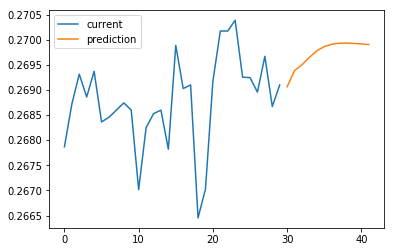

(1, 30, 4)


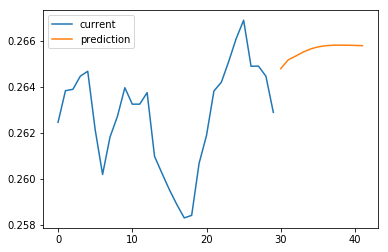

(1, 30, 4)


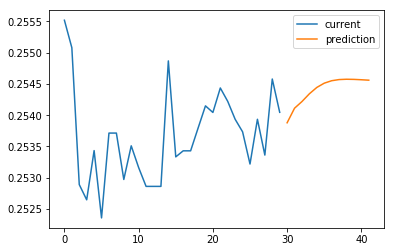

(1, 30, 4)


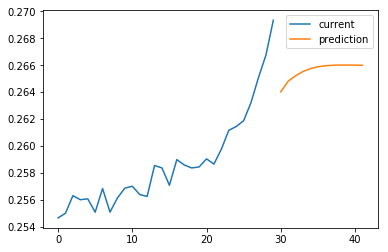

(1, 30, 4)


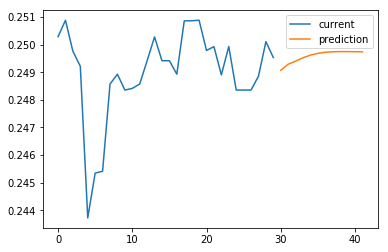

(1, 30, 4)


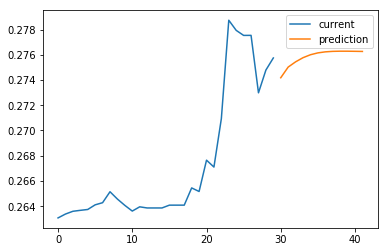

(1, 30, 4)


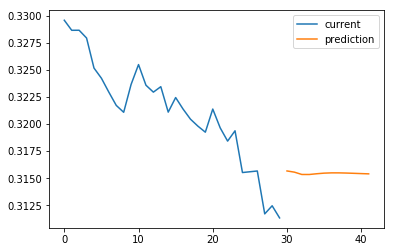

In [21]:
# do some now & past predictions
for t in [0, 100, 200, 300, 500, 1000, 2000]:
    rt_x, prediction = predict(time.time()-t*period)

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

Sun, 01 Jul 2018 10:55:00 +0000
(1, 30, 4)


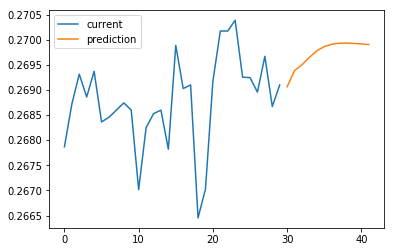

Sun, 01 Jul 2018 11:00:00 +0000
(1, 30, 4)


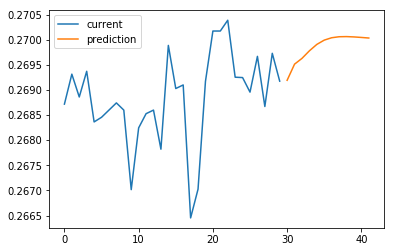

In [ ]:
#Prediction on live data!
starttime=time.time()
while True:
    now = time.time() 
    end = now - now % period
    print time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end))
    rt_x, prediction = predict()

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

    time.sleep(period - ((time.time() - starttime) % period))